# <center> Mis primeros scripts en Python <center>  

**¿Qué vamos a hacer?** La idea de este notebook es que tengan ejemplos de códigos que les permitan modelar un movimiento, graficar la trayectoria de una partícula, hacer cambios de coordenadas y por último, obtener valores de velocidad y aceleración de una partícula a partir de su posición y del tiempo.  

Puntualmente vamos a :
* Obtener valores de las componentes cartesianas (x,y) y el tiempo t del tiro oblicuo,  
* Cambiar de coordenadas: de cartesianas a polares y viceversa,  
* Calcular la velocidad y aceleración a partir de diferencias finitas  

### Recordemos algunas ecuaciones  
#### Tiro oblicuo  
Las ecuaciones de posición, velocidad y aceleración en función del tiempo para las coordenadas cartesianas son:  
 \begin{equation*}
    \begin{array}{cc}
     \left\lbrace\begin{array}{c}
       a_{x}(t) = 0 \\
       v_{x}(t)  = v_{0}\cos(\theta)   \\
       x(t) = x_{0} + v_{0}\cos(\theta)(t-t_{0})
     \end{array}\right.    & \left\lbrace\begin{array}{c}
     a_{y}(t) = -9.81 \\
     v_{y}(t) = v_{0}\sin(\theta) -9.81(t-t_{0})\\
     y(t) = y_{0} + v_{0}\sin(\theta)(t-t_{0}) - \frac{1}{2}9.81(t-t_{0})^{2}
     \end{array}\right.
    \end{array}
    \end{equation*}
     
#### Velocidad y aceleración  
La aceleración y velocidad instantáneas se definen como $\bar{v} = \frac{\mathrm{d}\bar{r}}{\mathrm{d}t}$ y $\bar{a} = \frac{\mathrm{d}\bar{v}}{\mathrm{d}t}$. Teniendo en cuenta estas definiciones nosotros calcularemos los valores de $\bar{v}$ y $\bar{a}$ con diferencias finitas:
\begin{equation*}
    \begin{array}{cc}
    \bar{v} = \frac{\Delta\bar{r}}{\Delta t} & \bar{a} = \frac{\Delta\bar{v}}{\Delta t}
    \end{array}
\end{equation*}



**1)** Primero importaremos librerías especializadas de Python, como *numpy* y *matplotlib*, que contienen funciones y módulos predefinidos que facilitaran hacer algunos cálculos.   
**2)** Luego escribiremos nuestras propias funciones que nos permitiran hacer los cálculos que queremos. Una función es un bloque de líneas de código o un conjunto de instrucciones cuya finalidad es realizar una tarea específica.  
**3)** Por último llamaremos a las funciones y graficaremos los resultados


###  1) Importamos las librerías

Es una buena costumbre importar cada librería con un alias, para luego llamar a esa librería de una manera abreviada. Por ejemplo, importamos la librería numpy con el alias np.  
En el caso de que no tengamos instalada alguna librería, podemos instalarla desde la consola de comando escribiendo *pip install nombre_librería*, y si estamos en Google Colab escribimos en una celda *!pip install nombre_librería*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Definimos las funciones que utilizaremos    
Para definir una función en Python, utilizamos la palabra clave <span style = "color:blue;">def</span>, seguida del nombre de la función y paréntesis que pueden contener los parámetros de entrada. Luego, el bloque de código de la función se identa con un tabulador. Finalmente, para que la función devuelva un valor, utilizamos la palabra clave <span style = "color:green;">return</span>.

In [2]:
def tiro_oblicuo(v_ini,inclinacion,gravedad=9.81,t_ini=0,x_ini=0,y_ini=0,n_puntos=1000):

    ''' Esta función devuelve los valores de t, x e y correspondientes a un tiro oblicuo.
    v_ini: módulo de la velocidad inicial del cuerpo
    inclinacion: ángulo que forma la velocidad inicial con el eje horizontal (en radianes)
    gravedad: aceleración de la gravedad (por defecto es igual a 9.81 m/s^2)
    t_ini: tiempo inicial (por defecto es igual a 0 s)
    x_ini: posición inicial en x (por defecto es igual a 0 m)
    y_ini: altura inicial (por defecto es igual a 0 m)
    n_puntos: número de puntos (por defecto es igual a 1000)
    t va desde t_ini hasta el tiempo en el que llega al suelo (t_fin).
    x va desde x_ini hasta x(t_fin)
    y va desde y_ini hasta y(t_fin)
    '''

    t_fin = (v_ini*np.sin(inclinacion) + np.sqrt((v_ini*np.sin(inclinacion))**2+2*gravedad*y_ini))/gravedad
    t = np.linspace(0,t_fin,n_puntos) # Este script nos devolverá n_puntos linealmente espaciados desde 0 hasta el tiempo
                                      # final t_fin
    x = x_ini + v_ini*np.cos(inclinacion)*t
    y = y_ini + v_ini*np.sin(inclinacion)*t - 0.5*gravedad*t**2

    return t,x,y

def cartesian_to_polar(x_coords, y_coords):
    '''
    Esta función devuelve una lista con el radio r y otra lista con el ángulo theta medido desde la horizontal para las coordenadas polares a
    partir de las coordenadas cartesianas.
    x: lista con los valores de x
    y: lista con los valores de y
    '''
    r_coords = [] # Inicializo una lista vacía para los valores de la coordenada r
    theta_coords = [] # Inicializo una lista vacía para los valores del ángulo medido desde el eje +x
    for x, y in zip(x_coords, y_coords):
        r = np.sqrt(x**2 + y**2)
        theta = np.arctan2(y, x)
        r_coords.append(r)
        theta_coords.append(theta)

    return r_coords, theta_coords

def polar_to_cartesian(r, theta):
    '''
    Esta función devuelve dos listas, una lista para los valores de posición en x y otra para los valores de y,
    a partir de los valores r y theta de las coordenadas polares.
    r : valores del radio de polares.
    theta: valores del ángulo que forma el radio r con la horizontal.
    '''
    x_coords = [] # Inicializo una lista vacía para la coordenada x
    y_coords = [] # Inicializo una lista vacía para la coordenada y
    for r, theta in zip(r, theta):
        x = r * np.cos(theta) # Proyecto el radio en x para cada par de valores (r, theta)
        y = r * np.sin(theta) # Proyecto el radio en y para cada par de valores (r, theta)
        x_coords.append(x) # Agrego el valor de x a la lista x_coords en cada iteración
        y_coords.append(y)

    return x_coords, y_coords

def calculate_velocity(x_values, y_values, t_values):
    '''
    Esta función devuelve las componentes x e y del vector velocidad en cartesianas,
    calculadas a partir de diferencias finitas.
    x_values: serie con la coordenada x
    y_values: serie con la coordenada y
    t_values: serie con el tiempo de cada coordenada x e y
    '''
    dx_dt = np.diff(x_values) / np.diff(t_values)
    dy_dt = np.diff(y_values) / np.diff(t_values)

    return dx_dt.round(4), dy_dt.round(4)

def calculate_aceleration(vx, vy, t_values):
    '''
    Esta función devuelve las componentes x e y del vector aceleración en cartesianas,
    calculadas a partir de diferencias finitas.
    x_values: serie con la coordenada x
    y_values: serie con la coordenada y
    t_values: serie con el tiempo de cada coordenada x e y
    '''
    ax = np.diff(vx) / np.diff(t_values) # La función diff() de numpy calcula la diferencia entre dos puntos sucesivos.
    ay = np.diff(vy) / np.diff(t_values)

    return ax.round(3), ay.round(4) # Con round(3) redondeamos el valor con 3 cifras.


Con la función <span style = "color:blue;">tiro_oblicuo</span> vamos a generar 1000 puntos con las coordenadas $xy$ y con el valor del tiempo correspondientes a la trayectoria de un tiro oblicuo. Le daremos a la función las siguientes condiciones iniciales:  
* velocidad inicial de $10\frac{m}{s}$,  
* ángulo de la velocidad inicial de 1 $rad$,  
* $y_{0} = 0$,    
* $x_{0} = 0$,  
* $t_{0} = 0$

In [3]:
t,x,y = tiro_oblicuo(10,1,gravedad=9.81,t_ini=0,x_ini=0,y_ini=0,n_puntos=1000)

Convierto los resultados de x e y a coordenadas polares.

In [4]:
r,theta = cartesian_to_polar(x, y)

Vamos a ver cómo queda la gráfica de la trayectoria del tiro oblicuo a partir de sus coordenadas en polares

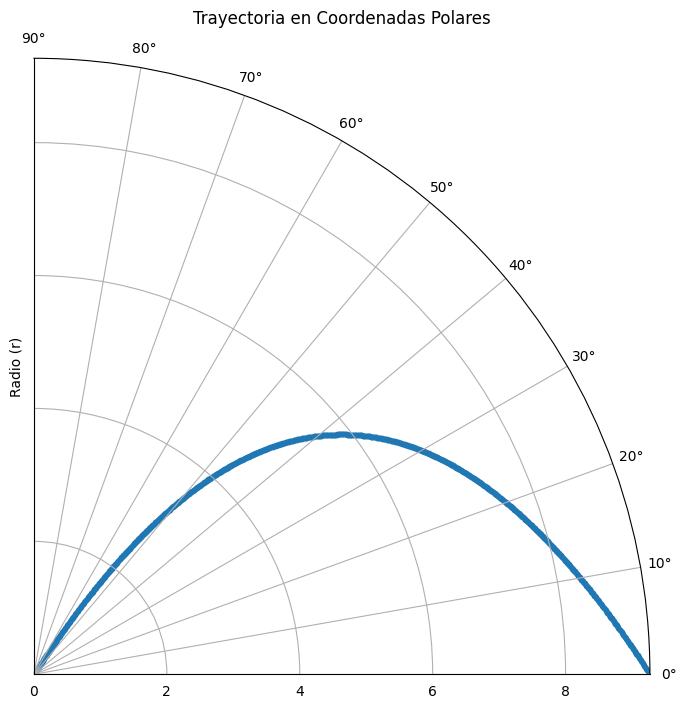

In [5]:
plt.figure(figsize=(8, 8)) # Creo una figura de tamaño (8,8)
# Creo un único subplot dentro de la figura
ax = plt.subplot(111, polar=True) # Con el parámetro polar = True indicamos que estamos utilizando el sistema de coordenadas polares
ax.scatter(theta, r, marker='.', linestyle='-') # Con la función scatter grafico los puntos
ax.set_xlim(0, np.pi/2)
ax.set_ylim(0, max(r))
plt.title('Trayectoria en Coordenadas Polares')
plt.ylabel('Radio (r)')
plt.show()

Volvemos a calcular las coordenadas cartesianas a partir de las polares y grafico los resultados

In [6]:
x,y = polar_to_cartesian(r,theta)

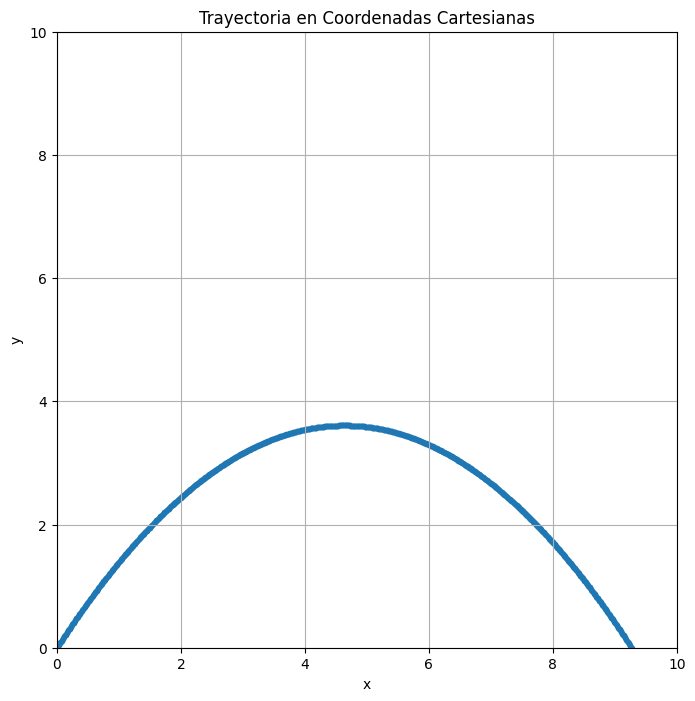

In [7]:
plt.figure(figsize=(8, 8)) # Creo una figura de tamaño (8,8)
ax = plt.subplot(111)
ax.scatter(x, y, marker='.', linestyle='-') #Con la función scatter grafico los puntos x e y
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.title('Trayectoria en Coordenadas Cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Vemos que obtenemos la misma trayectoria

Por ejemplo, si a nuestro gráfico queremos agregar un vector posición que vaya desde el origen hasta la altura máxima, podemos utilizar la opción ax.quiver(0, 0, x_max, h_max).  
Primero ubicamos la altura máxima $max(y)$, y luego ubicamos cuál es la posición de x.

In [8]:
h_max = max(y) # Encuentro la altura máxima
posicion_lista = y.index(h_max) # Úbico en qué posición de la lista y toma el valor máximo
x_max = x[500]
print("La altura máxima", h_max , "aparece en la posición:", posicion_lista)
print("La posición en x en la altura máxima es: ", x_max)

La altura máxima 3.6089332761563657 aparece en la posición: 499
La posición en x en la altura máxima es:  4.639182642508369


In [9]:
x_max

4.639182642508369

In [11]:
 x[500], y[500]

(4.639182642508369, 3.6089332761563657)

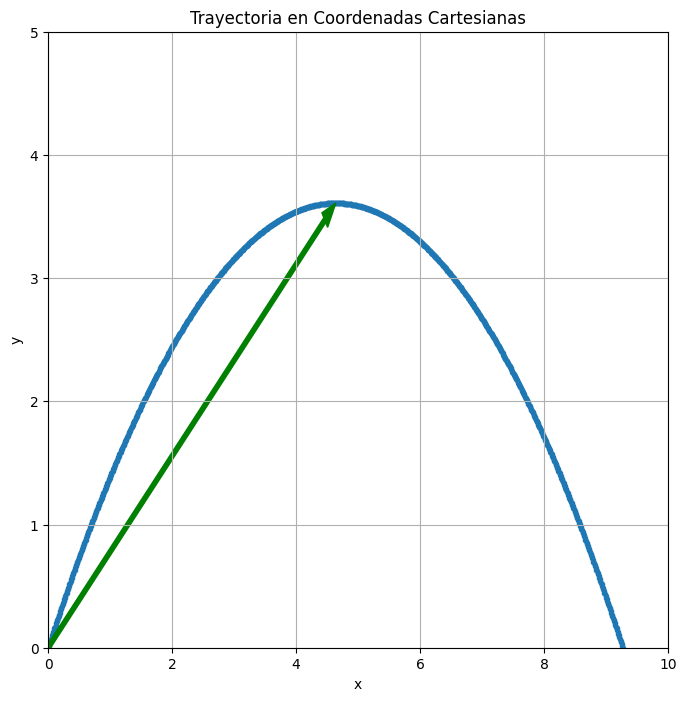

In [27]:
plt.figure(figsize=(8, 8)) # Creo una figura de tamaño (8,8)
ax = plt.subplot(111)
ax.scatter(x, y, marker='.', linestyle='-') #Con la función scatter grafico los puntos x e y
ax.arrow(0,0,x[500],y[500], width = 0.05,length_includes_head = True, color = 'green') # Agrego el vector posición desde el origen a la altura máxima
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
plt.title('Trayectoria en Coordenadas Cartesianas')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Les recomendamos qué cambien los parámetros de entrada para la función <span style = "color:blue;">tiro_oblicuo</span>, para ver cómo quedan las gráficas con distintas condiciones iniciales.

## <center> Velocidad y aceleración <center>

Con las funciones <span style = "color:blue;">calculate_velocity</span> y <span style = "color:blue;">calculate_aceleration</span> calcularemos las componentes x e y de la velocidad y la aceleración. Para ello utilizaremos los valores de $x$, $y$ y $t$.

In [ ]:
vx, vy = calculate_velocity(x,y,t)

Ahora calculamos las componentes de aceleración a partir de las componentes de la velocidad y del tiempo.
Hay que tener en cuenta que a partir de $n$ puntos, obtendremos $n-1$ valores de velocidad (¿Por qué?). Así que, para calcular la aceleración trabajaremos con la lista de tiempos "$t$" a partir del segundo valor ( t [1:] )

In [ ]:
ax, ay = calculate_aceleration(vx,vy, t[1:])

Graficamos los resultados

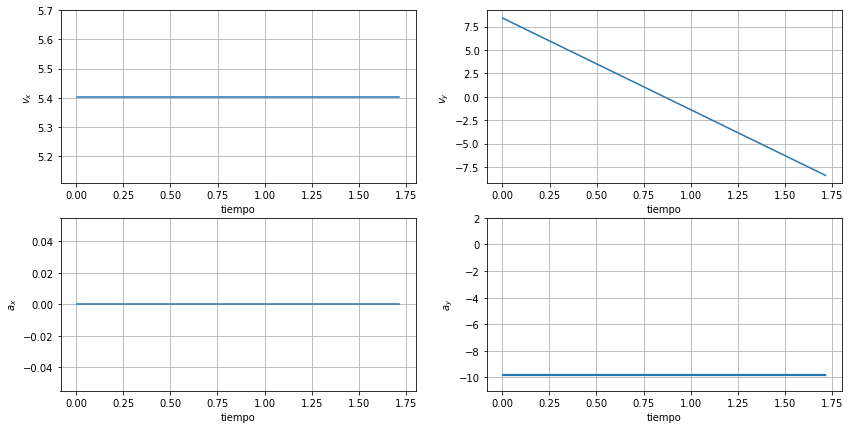

In [ ]:
#Creamos una figura con dos filas y dos columnas
fig, axs=plt.subplots(2,2, figsize = (14,7))

# Con el comando axs[i,j].plot() graficamos los valores de velocidad o aceleración indicando la posición de cada gráfica
# en dónde i representa la fila y j la columna.

#-------Componentes de la velocidad---
axs[0,0].plot(t[1:],vx)
axs[0,0].set_xlabel('tiempo')
axs[0,0].set_ylabel('$v_{x}$')
axs[0,0].grid(True)

axs[0,1].plot(t[1:], vy)
axs[0,1].set_xlabel('tiempo')
axs[0,1].set_ylabel('$v_{y}$')
axs[0,1].grid(True)

#-------Componentes de la aceleración---
axs[1,0].plot(t[2:],ax)
axs[1,0].set_xlabel('tiempo')
axs[1,0].set_ylabel('$a_{x}$')
axs[1,0].grid(True)

axs[1,1].plot(t[2:], ay)
axs[1,1].set_xlabel('tiempo')
axs[1,1].set_ylabel('$a_{y}$')
axs[1,1].set_ylim(-11,2)
axs[1,1].grid(True)
plt.show()
